# Détection de fraude en Deep Learning

Librairies

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Base de données

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Analyse des données

In [9]:
pd.set_option('precision', 5)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00000,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,...,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,284807.00000,284807.00000
mean,94813.85958,3.91865e-15,5.68269e-16,-8.76174e-15,2.81112e-15,-1.55210e-15,2.04013e-15,-1.69895e-15,-1.89329e-16,-3.14764e-15,...,1.47312e-16,8.04211e-16,5.28251e-16,4.45627e-15,1.42690e-15,1.70164e-15,-3.66225e-16,-1.21781e-16,88.34962,0.00173
std,47488.14595,1.95870e+00,1.65131e+00,1.51626e+00,1.41587e+00,1.38025e+00,1.33227e+00,1.23709e+00,1.19435e+00,1.09863e+00,...,7.34524e-01,7.25702e-01,6.24460e-01,6.05647e-01,5.21278e-01,4.82227e-01,4.03632e-01,3.30083e-01,250.12011,0.04153
min,0.00000,-5.64075e+01,-7.27157e+01,-4.83256e+01,-5.68317e+00,-1.13743e+02,-2.61605e+01,-4.35572e+01,-7.32167e+01,-1.34341e+01,...,-3.48304e+01,-1.09331e+01,-4.48077e+01,-2.83663e+00,-1.02954e+01,-2.60455e+00,-2.25657e+01,-1.54301e+01,0.00000,0.00000
25%,54201.50000,-9.20373e-01,-5.98550e-01,-8.90365e-01,-8.48640e-01,-6.91597e-01,-7.68296e-01,-5.54076e-01,-2.08630e-01,-6.43098e-01,...,-2.28395e-01,-5.42350e-01,-1.61846e-01,-3.54586e-01,-3.17145e-01,-3.26984e-01,-7.08395e-02,-5.29598e-02,5.60000,0.00000
50%,84692.00000,1.81088e-02,6.54856e-02,1.79846e-01,-1.98465e-02,-5.43358e-02,-2.74187e-01,4.01031e-02,2.23580e-02,-5.14287e-02,...,-2.94502e-02,6.78194e-03,-1.11929e-02,4.09761e-02,1.65935e-02,-5.21391e-02,1.34215e-03,1.12438e-02,22.00000,0.00000
75%,139320.50000,1.31564e+00,8.03724e-01,1.02720e+00,7.43341e-01,6.11926e-01,3.98565e-01,5.70436e-01,3.27346e-01,5.97139e-01,...,1.86377e-01,5.28554e-01,1.47642e-01,4.39527e-01,3.50716e-01,2.40952e-01,9.10451e-02,7.82800e-02,77.16500,0.00000
max,172792.00000,2.45493e+00,2.20577e+01,9.38256e+00,1.68753e+01,3.48017e+01,7.33016e+01,1.20589e+02,2.00072e+01,1.55950e+01,...,2.72028e+01,1.05031e+01,2.25284e+01,4.58455e+00,7.51959e+00,3.51735e+00,3.16122e+01,3.38478e+01,25691.16000,1.00000


La colomne Class nous donne l'informations : Not Fraud 1/ Fraud 0

In [11]:
class_names = {0:'Not Fraud', 1:'Fraud'}
rvs = df.Class.value_counts().rename(index = class_names)
print(rvs)

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


### Préparation de nos variable et paramètres

In [4]:
X = df.drop(columns =['Class'])
Y = df['Class']

Y = np.array(Y)
Y = np.reshape(Y, (284807, 1))

X = np.array(X)
X = np.reshape(X, (284807, 30))

print(X.shape)
print(Y.shape)

(284807, 30)
(284807, 1)


Séparer train et test set

In [5]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(199364, 30) (42721, 30) (42722, 30) (199364, 1) (42721, 1) (42722, 1)


## Modèle

In [40]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(32, activation='relu', input_shape=(X.shape[1],)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))
 

model.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

Entrainement du modèle

In [47]:
hist = model.fit(X_train, Y_train,batch_size=32, epochs=100,validation_data=(X_val, Y_val))

Epoch 1/100
6231/6231 [==============================] - 5s 844us/step - loss: 6.0771e-04 - accuracy: 0.9993 - val_loss: 3.3351e-04 - val_accuracy: 0.9996
Epoch 2/100
6231/6231 [==============================] - 6s 890us/step - loss: 6.2186e-04 - accuracy: 0.9993 - val_loss: 5.7450e-04 - val_accuracy: 0.9994
Epoch 3/100
6231/6231 [==============================] - 6s 900us/step - loss: 6.8794e-04 - accuracy: 0.9993 - val_loss: 2.2183e-04 - val_accuracy: 0.9998
Epoch 4/100
6231/6231 [==============================] - 5s 844us/step - loss: 8.7075e-04 - accuracy: 0.9991 - val_loss: 3.1444e-04 - val_accuracy: 0.9996
Epoch 5/100
6231/6231 [==============================] - 5s 776us/step - loss: 6.2746e-04 - accuracy: 0.9993 - val_loss: 4.9216e-04 - val_accuracy: 0.9996
Epoch 6/100
6231/6231 [==============================] - 6s 931us/step - loss: 7.9951e-04 - accuracy: 0.9992 - val_loss: 2.5729e-04 - val_accuracy: 0.9997
Epoch 7/100
6231/6231 [==============================] - 5s 860us/step

Évaluation du modèle

In [48]:
model.evaluate(X_test, Y_test)[1]

1336/1336 [==============================] - 1s 443us/step - loss: 5.5588e-04 - accuracy: 0.9994


0.9994148015975952

#### Visualisation du Loss

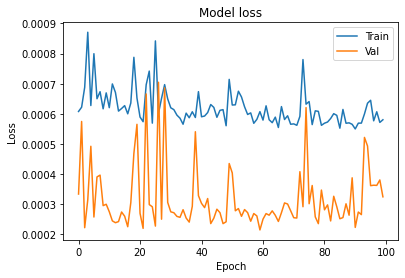

In [49]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Matrices de confusion

In [51]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

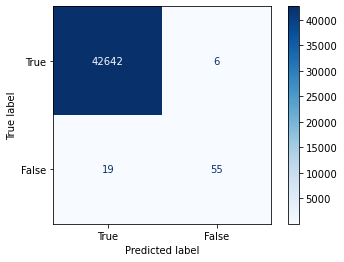

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

labels = ['True', 'False']

cm = confusion_matrix(Y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Le but est d'avoir un taux de faux négatif le plus bas possible